# Best Machine Learning Models to Predict Osteoporosis Risk

##1.Project Overview
Osteoporosis is a severe condition characterized by weakened bones, leading to an increased risk of fractures. Early prediction and diagnosis can help in managing and preventing the condition, thereby improving the quality of life for at-risk individuals, particularly older women.

The primary goal of this project is to predict the risk of osteoporosis in patients using machine learning techniques. By analyzing patients' medical records, we aim to identify key features that contribute to osteoporosis risk and enhance prediction accuracy through significant feature selection and oversampling techniques.

##2.About the dataset
The dataset offers comprehensive information on health factors influencing osteoporosis development, including demographic details, lifestyle choices, medical history, and bone health indicators. It aims to facilitate research in osteoporosis prediction, enabling machine learning models to identify individuals at risk. Analyzing factors like age, gender, hormonal changes, and lifestyle habits can help improve osteoporosis management and prevention strategies.

### Dataset Description
| Column                           | Description                                                |
|----------------------------------|------------------------------------------------------------|
| `ID`                             | Unique identifier for each patient                         |
| `Age`                            | Age of the patient                                         |
| `Gender`                         | Gender of the patient                                      |
| `Hormonal Changes`               | Whether the patient has undergone hormonal changes         |
| `Family History with Osteoporosis` | Whether the patient has a family history of osteoporosis   |
| `Race/Ethnicity`                 | Race or ethnicity of the patient                           |
| `Body Weight`                    | Weight details of the patient                              |
| `Calcium`                        | Calcium levels in the patient's body                       |
| `Vitamin D`                      | Vitamin D levels in the patient's body                     |
| `Physical Activity`              | Physical activity details of the patient                   |
| `Smoking`                        | Whether the patient smokes                                 |
| `Alcohol Consumption`            | Whether the patient consumes alcohol                       |
| `Medical Conditions`             | Medical conditions of the patient                          |
| `Medication`                     | Medication details of the patient                          |
| `Prior Fracture`                 | Whether the patient has had a prior fracture               |
| `Osteoporosis`                   | Whether the patient has osteoporosis                       |


##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.4 MB/s eta 0:00:00


In [2]:
!pip install ngboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=444f239f3513d8ecde945a3cd5a02d658f66119f49b96893aa57adf343cb3805
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is inc

In [4]:
!pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 3.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [7]:
from google.colab import files
uploaded = files.upload()

Saving osteoporosis.csv to osteoporosis.csv


In [8]:
# Loading the dataset
file_path = 'osteoporosis.csv'
data = pd.read_csv(file_path)

In [9]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [10]:
#checking the shape of the dataset
data.shape

(1958, 16)

In [11]:
#checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1958.0,105515.320735,2589.407806,101008.0,103348.5,105469.0,107755.0,109996.0
Age,1958.0,39.101124,21.355424,18.0,21.0,32.0,53.0,90.0
Osteoporosis,1958.0,0.500000,0.500128,0.0,0.0,0.5,1.0,1.0


In [13]:
#columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]

#missing value percentage
print("Missing value percentage")
for column in columns_with_missing_values:
    print(column,":",data[column].isnull().sum()/data.shape[0]*100, "%")

Missing value percentage
Alcohol Consumption : 50.45965270684371 %
Medical Conditions : 33.04392236976506 %
Medications : 50.30643513789581 %


In [14]:
#value counts of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(data[column].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
Corticosteroids    973
Name: count, dtype: int64
Prior Fractures
Yes    983
No     975
Name: count, dtype: int64


In [15]:
data['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [16]:
# Define the features and target
numerical_features = ['Age']
categorical_features = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight',
                        'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption',
                        'Medical Conditions', 'Medications', 'Prior Fractures']

In [17]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


##4.Exploratory Data Analysis

### Target variable (Osteoporosis)

In [18]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

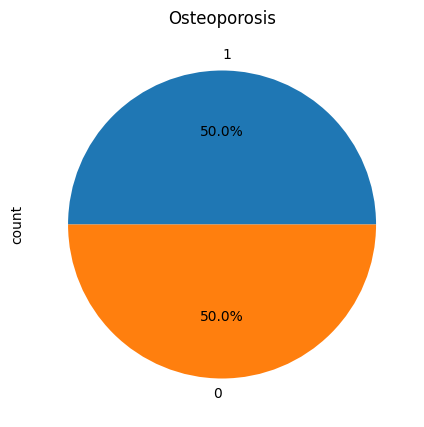

In [19]:
import matplotlib.pyplot as plt

# Create a pie chart for the target variable (Osteoporosis)
plt.figure(figsize=(5, 5))
data['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')
plt.show()

The above pie chart shows that the dataset is perfectly balanced with 50% of the patients having osteoporosis and 50% not having osteoporosis, which means that the dataset is not biased towards any class.

###Age and Osteoporosis

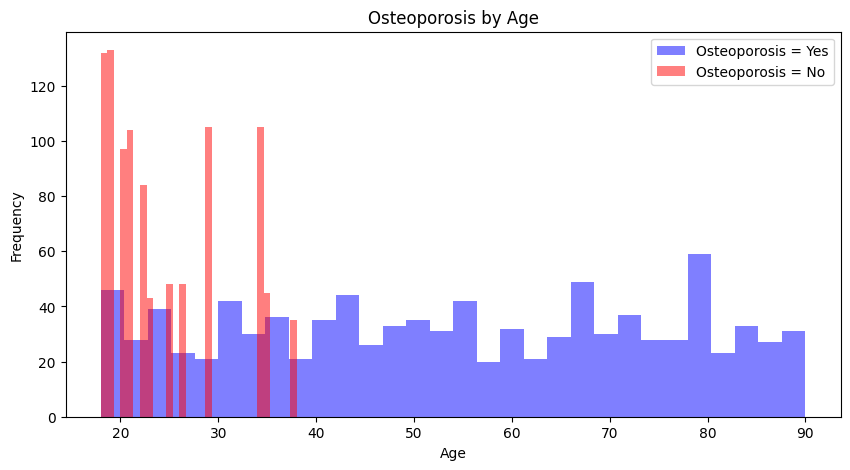

In [42]:
# Two-layer histogram for Age and Osteoporosis
plt.figure(figsize=(10, 5))

# Histogram for Osteoporosis = Yes
data[data['Osteoporosis'] == 1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Osteoporosis = Yes')

# Histogram for Osteoporosis = No
data[data['Osteoporosis'] == 0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='Osteoporosis = No')

# Legends and title
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Osteoporosis by Age')
plt.show()

This graph shows relation between the risk of osteoporosis and the age of the patient. In the graph we can see that that there is significant risk of osteoporosis in patients of all ages but patients between the ages 20 to 40 have significantly much lower risk of osteoporosis. This highlights that fact that younger patients are less likely to have osteoporosis.

###Gender and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


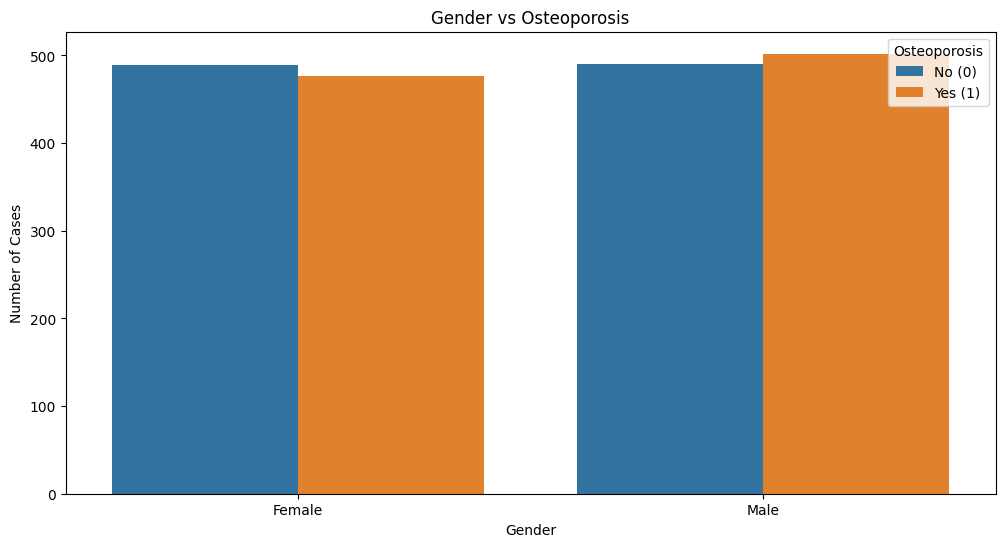

In [41]:
# Plotting Gender and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=data, hue='Osteoporosis').set_title('Gender vs Osteoporosis')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

In this graph, we can visualize the relationship between gender and the risk of osteoporosis. The graph shows that there is no concrete relationship between gender and the risk of osteoporosis, however, according to the numbers in the dataset, the males tend to have slightly higher number of osteoporosis cases than females, but the difference is not significant. Therefore, gender could be a weak predictor for osteoporosis.

###Hormonal Changes and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


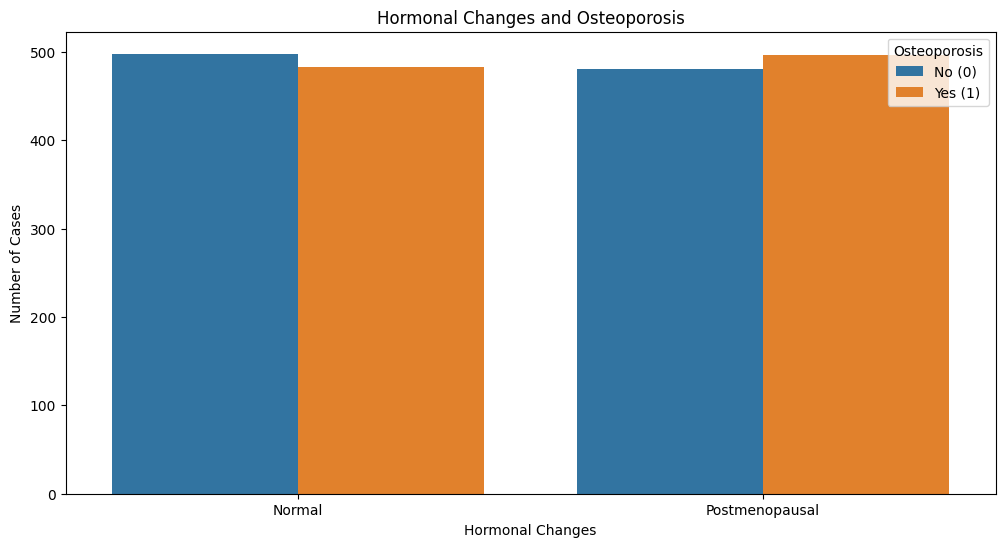

In [40]:
# Plotting Hormonal Changes and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x='Hormonal Changes', data=data, hue='Osteoporosis').set_title('Hormonal Changes and Osteoporosis')
plt.xlabel('Hormonal Changes')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

The graph shows that patients who have undergone hormonal changes have a higher risk of osteoporosis than those who have not undergone hormonal changes. This indicates that hormonal changes can be a significant risk factor for osteoporosis. This highlights that our hormones contribute in making our bones strong

###Family History and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


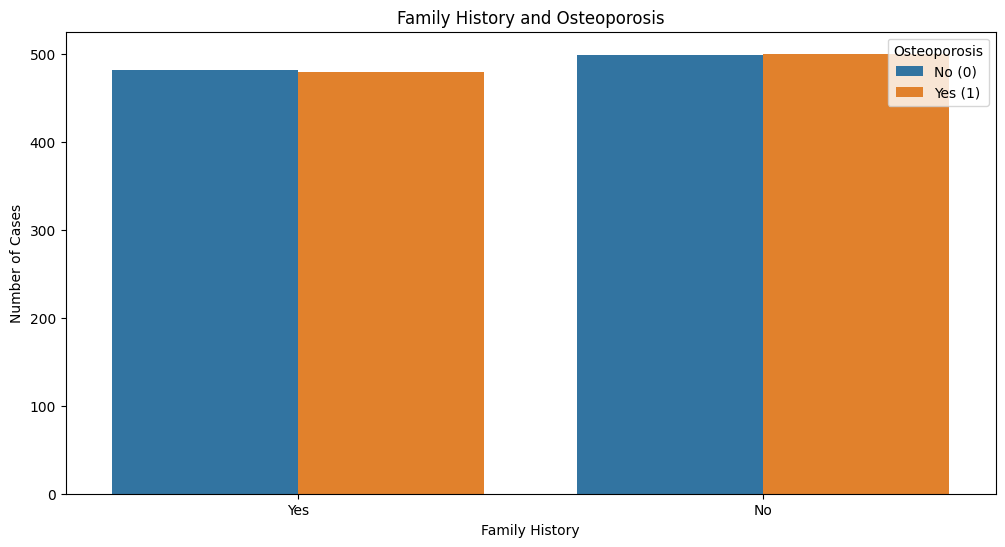

In [39]:
# Plotting Family History and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x="Family History", data=data, hue="Osteoporosis").set_title("Family History and Osteoporosis")
plt.xlabel('Family History')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

It is believed that genetics play a important role in the development of a disease. The graph shows the relationship between family history of osteoporosis and the risk of osteoporosis. But in the graph there is not much differnece in both cases regarding the risk of osteoporosis. Therefore, family history couldn;t be considered a predictor for osteoporosis.

###Race/Ethnicity and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


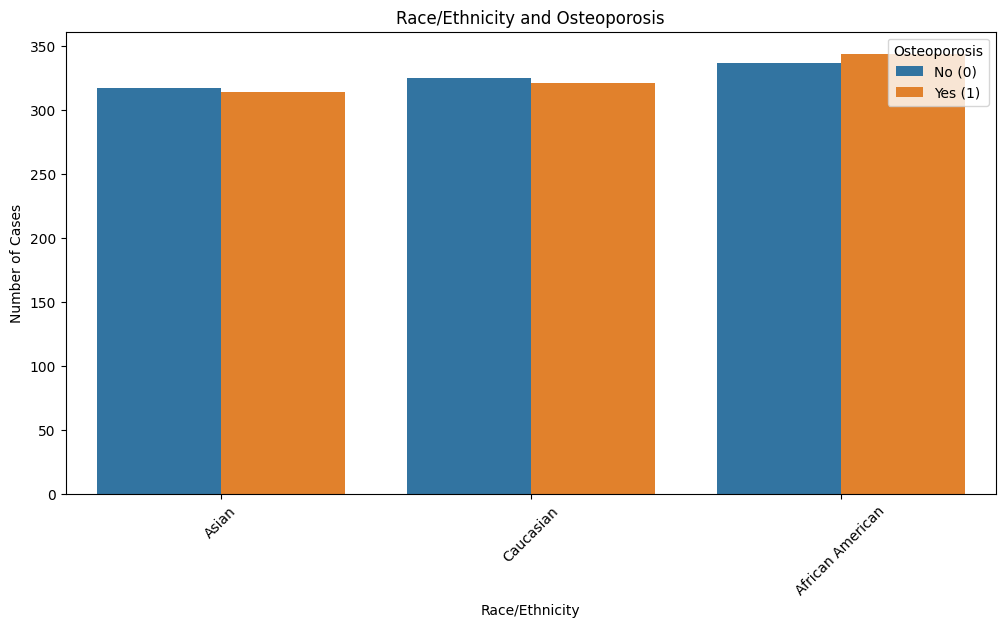

In [38]:
# Plotting Race/Ethnicity and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x="Race/Ethnicity", data=data, hue="Osteoporosis").set_title("Race/Ethnicity and Osteoporosis")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

This graph shows the relationship between Race/Ethnicity and the risk of osteoporosis. The graph shows that the risk of osteoporosis is almost similar with no concrete relationship between the race and risk of osteoporosis.

###Body Weight and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


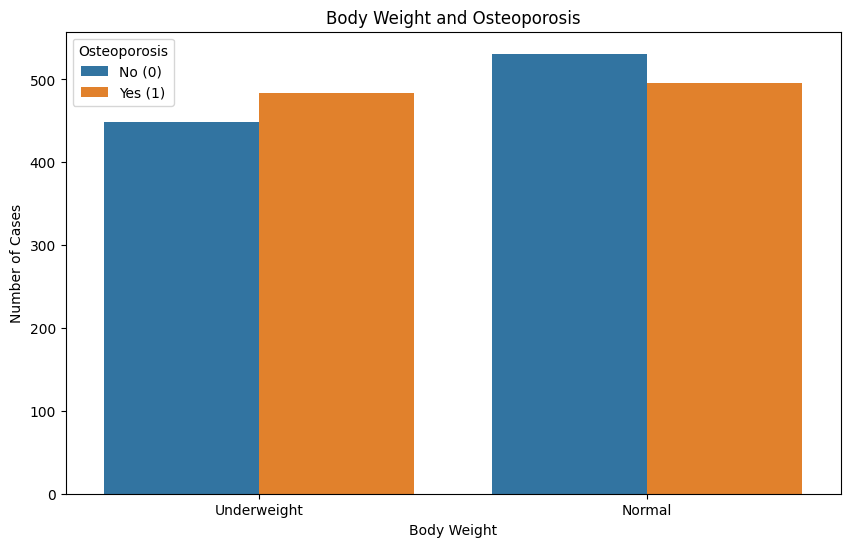

In [37]:
# Plotting Body Weight and Osteoporosis
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Weight", data=data, hue="Osteoporosis").set_title("Body Weight and Osteoporosis")
plt.xlabel('Body Weight')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

Body weight is an important factor in determining the risk of osteoporosis. The graph shows that patients with lower body weight have a higher risk of osteoporosis than those with higher body weight. This indicates that body weight can be a significant risk factor for osteoporosis. This highlights that our body weight contributes in making our bones strong.

###Nutrition and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

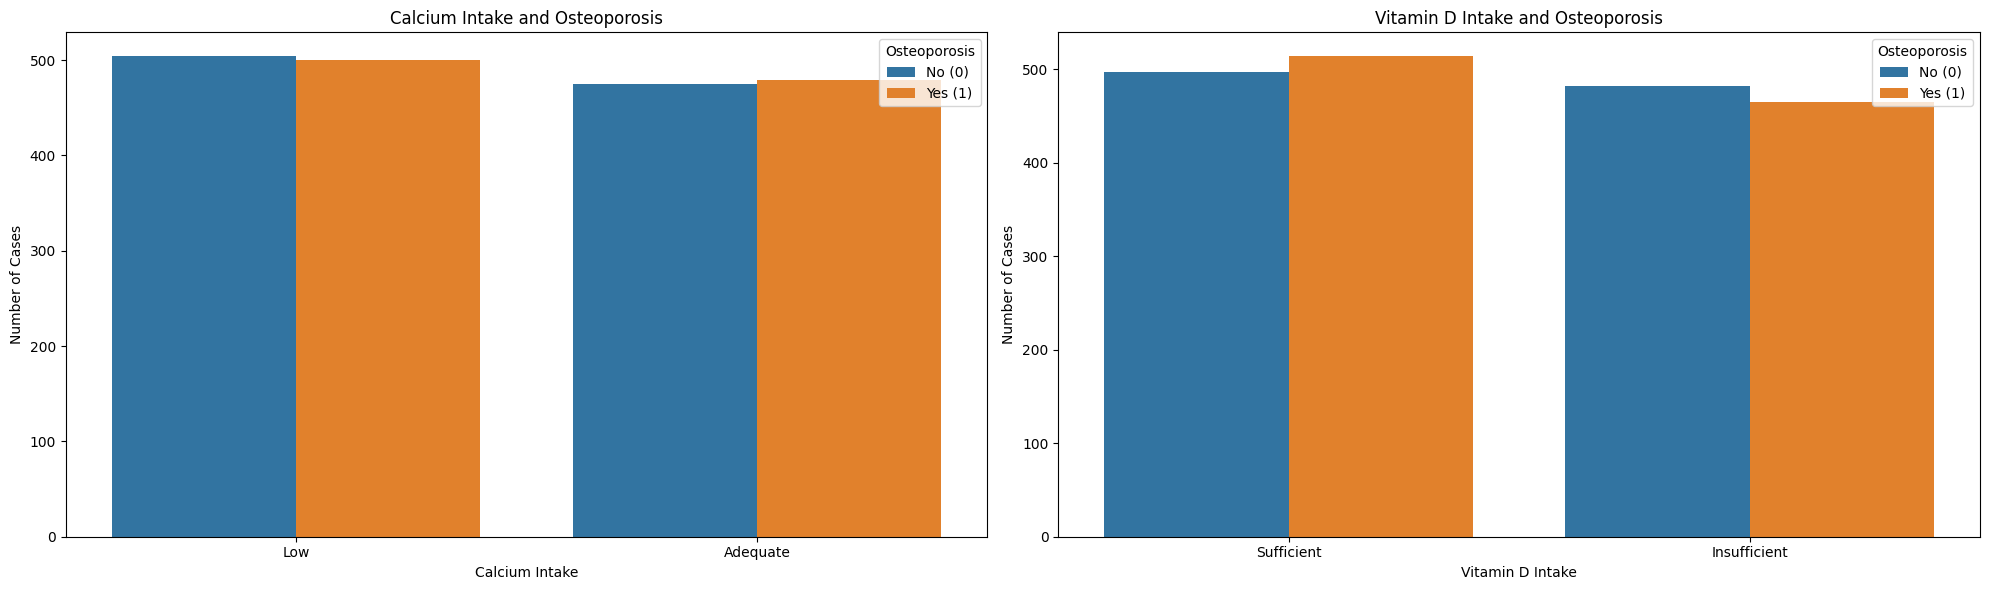

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting Calcium Intake and Osteoporosis
sns.countplot(x='Calcium Intake', data=data, ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
ax[0].set_xlabel('Calcium Intake')
ax[0].set_ylabel('Number of Cases')
ax[0].legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])

# Plotting Vitamin D Intake and Osteoporosis
sns.countplot(x='Vitamin D Intake', data=data, ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')
ax[1].set_xlabel('Vitamin D Intake')
ax[1].set_ylabel('Number of Cases')
ax[1].legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()

Nutrition and Osteoporosis are closely related. The graph shows that patients with lower calcium and vitamin D levels have a higher risk of osteoporosis than those with higher calcium and vitamin D levels. This indicates that nutrition can be a significant risk factor for osteoporosis. This highlights that our nutrition contributes in making our bones strong.

###Physical Activity and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


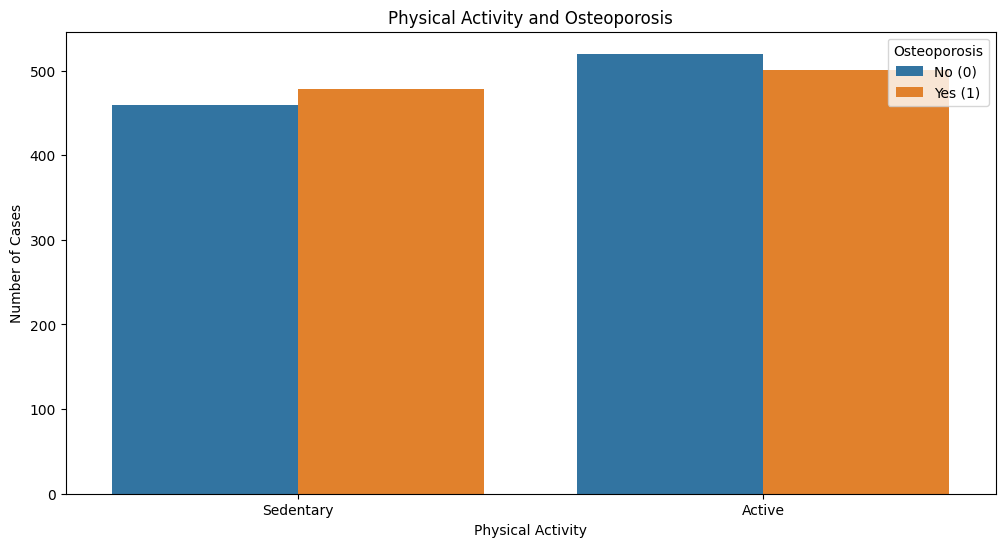

In [43]:
# Plotting Physical Activity and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical Activity', data=data, hue='Osteoporosis').set_title('Physical Activity and Osteoporosis')
plt.xlabel('Physical Activity')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

Physical Activity and Osteoporosis have a relation between them. The graph shows that patients with active physical acitve lifestyle lower risk of osteoporosis as compared to the patients with sedentary lifestyle.

###Smoking and Alcohol Consumption and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

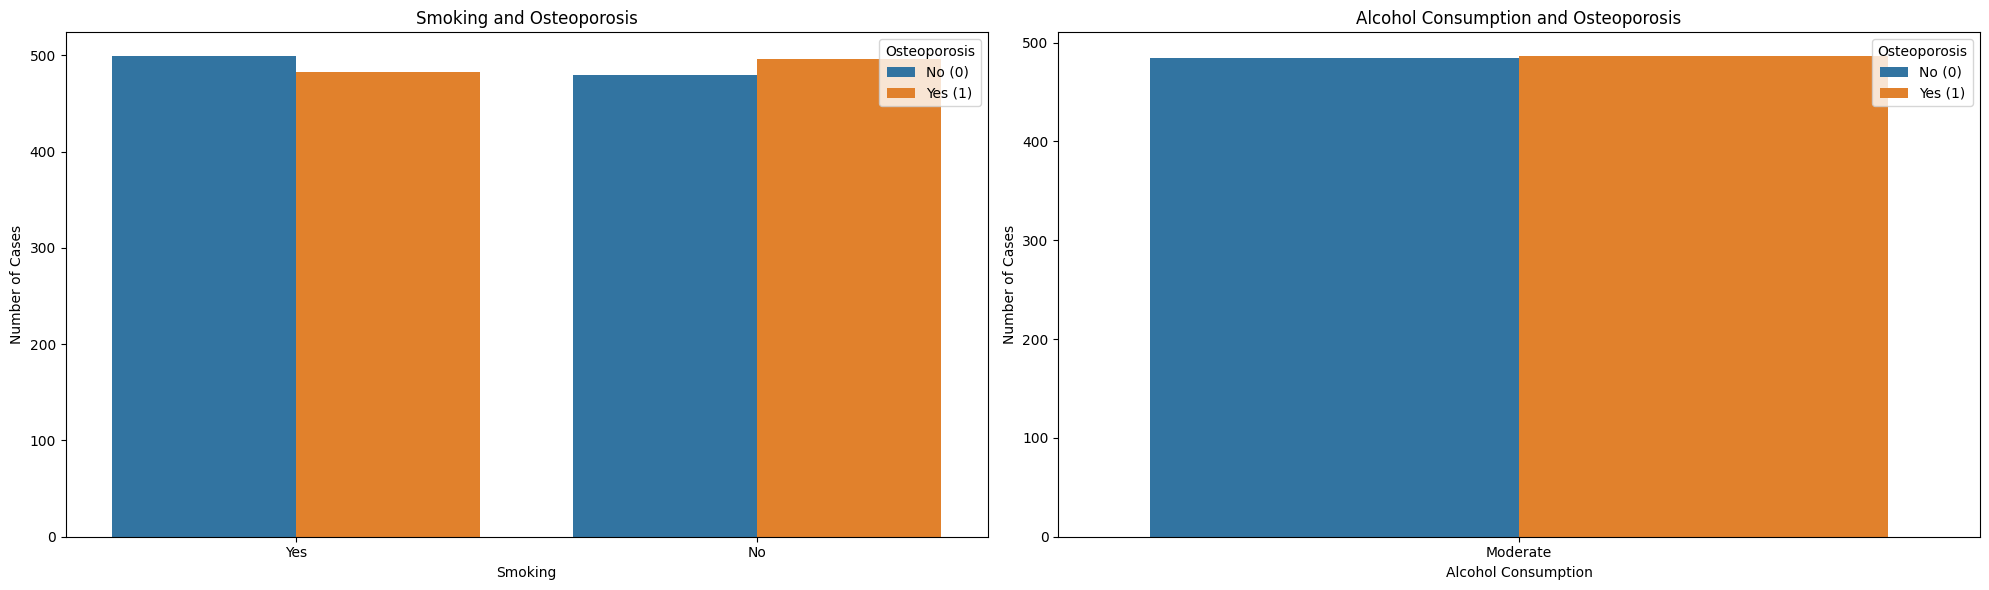

In [44]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting Smoking and Osteoporosis
sns.countplot(x='Smoking', data=data, ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
ax[0].set_xlabel('Smoking')
ax[0].set_ylabel('Number of Cases')
ax[0].legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])

# Plotting Alcohol Consumption and Osteoporosis
sns.countplot(x='Alcohol Consumption', data=data, ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')
ax[1].set_xlabel('Alcohol Consumption')
ax[1].set_ylabel('Number of Cases')
ax[1].legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()

Smoking and Alcohol Consumption are one of those factors that could have adverse effect on a patients health. Here, the graph shows that patients who smoke and consume alcohol does not relate to the risk of osteoporosis. This indicates that smoking and alcohol consumption are not significant risk factors for osteoporosis.

###Medical Conditions and Medications and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

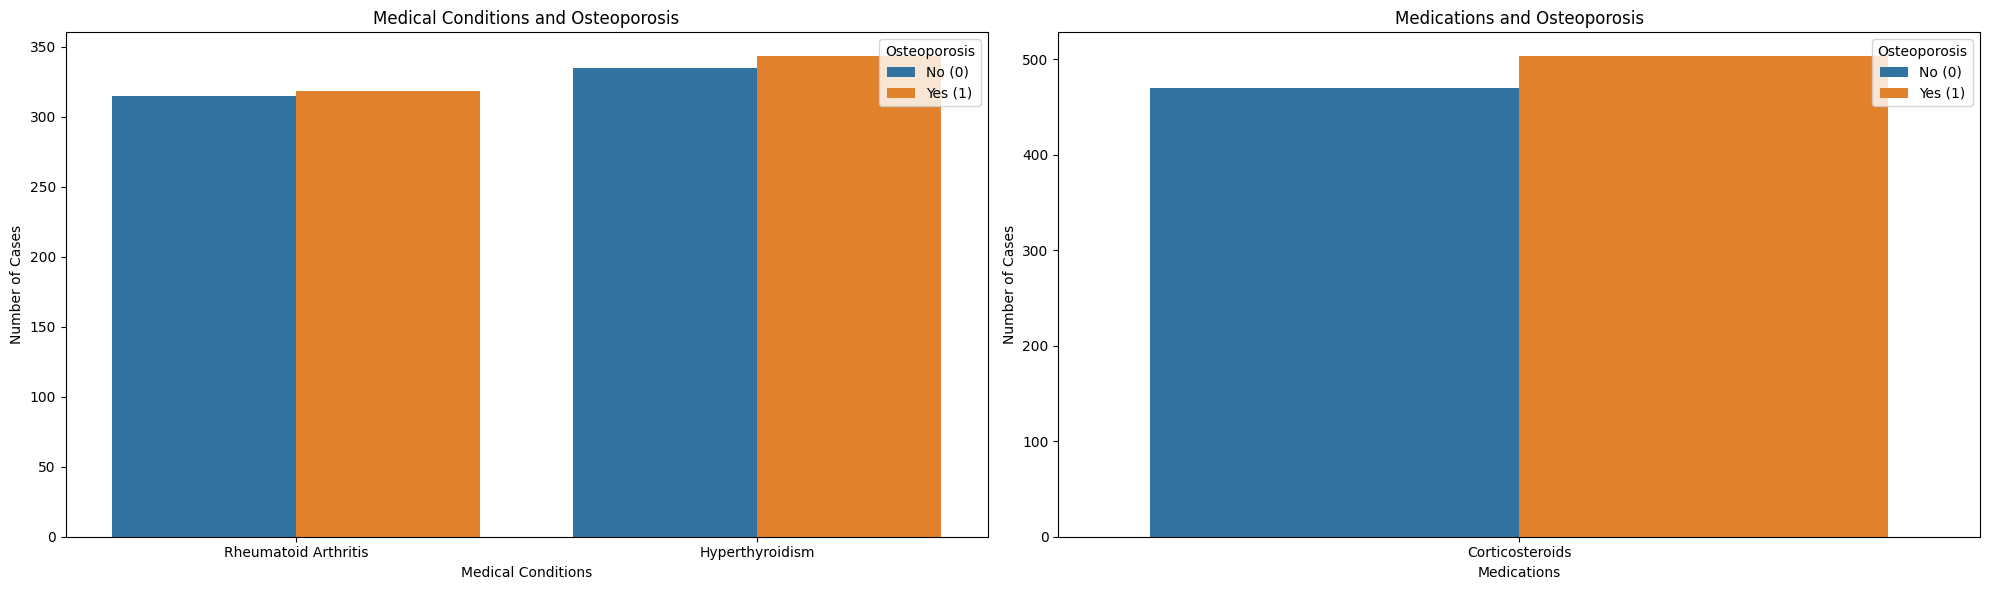

In [48]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting Medical Conditions and Osteoporosis
sns.countplot(x='Medical Conditions', data=data, ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
ax[0].set_xlabel('Medical Conditions')
ax[0].set_ylabel('Number of Cases')
legend_labels = ax[0].legend_.get_texts()
legend_labels[0].set_text('No (0)')
legend_labels[1].set_text('Yes (1)')

# Plotting Medications and Osteoporosis
sns.countplot(x='Medications', data=data, ax=ax[1], hue='Osteoporosis').set_title('Medications and Osteoporosis')
ax[1].set_xlabel('Medications')  # Correctly set the x-axis label for the second plot
ax[1].set_ylabel('Number of Cases')
legend_labels = ax[1].legend_.get_texts()
legend_labels[0].set_text('No (0)')
legend_labels[1].set_text('Yes (1)')

plt.tight_layout()
plt.show()

The graph shows that patients with medical conditions like Hyperthyroidism have a higher risk of osteoporosis than those without medical conditions. This indicates that medical conditions can be a significant risk factor for osteoporosis. In addition to that patients who consume medications like Corticosteriods have higher risk of osteoporosis.

###Prior Fracture and Osteoporosis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


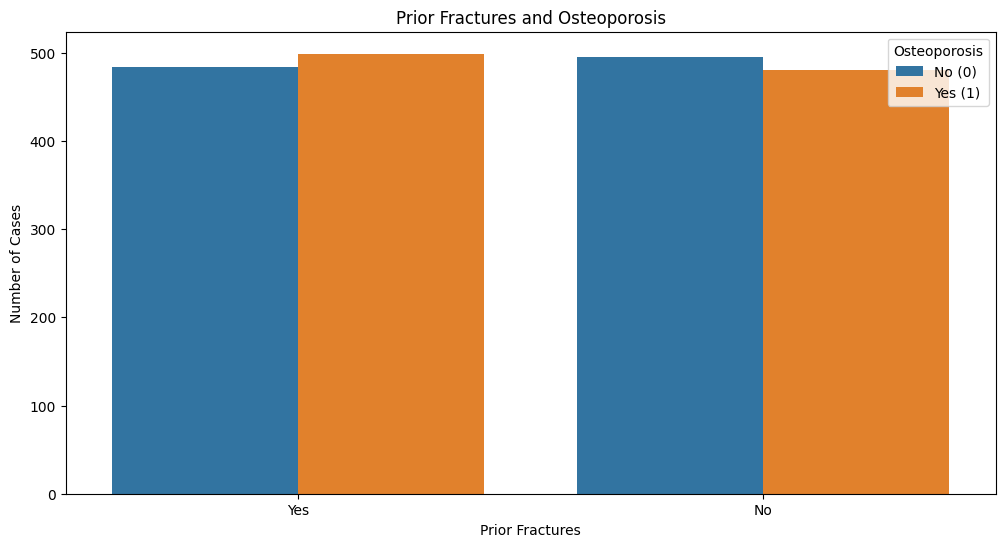

In [49]:
# Plotting Prior Fractures and Osteoporosis
plt.figure(figsize=(12, 6))
sns.countplot(x='Prior Fractures', data=data, hue='Osteoporosis').set_title('Prior Fractures and Osteoporosis')
plt.xlabel('Prior Fractures')
plt.ylabel('Number of Cases')
plt.legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])
plt.show()

This graph shows the relation between the prior incident of fractures and risk of osteoporosis and from the graph it is clear that there is no concrete relationship between the prior incident of fractures and risk of osteoporosis.

##5.Training the models

In [50]:
# Label Encoding the Categorical Variables
#columns for label encoding
cols = data.select_dtypes(include=['object']).columns

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols:
    data[col] = le.fit_transform(data[col])
    print(col,":",data[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [1 2 0]
Medications : [0 1]
Prior Fractures : [1 0]


In [51]:
# Prepare the data
X = data.drop(['Id', 'Osteoporosis'], axis=1)
y = data['Osteoporosis']

In [52]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Initialize the preprocessor (example using StandardScaler)
preprocessor = StandardScaler()

X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [53]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "NGBoost": NGBClassifier(random_state=42),
    "Support Vector Classifier": SVC(kernel='linear', random_state=42, probability=True)
}

In [54]:
# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, auc_score, fpr, tpr, cm

##6.Evaluating the model

In [55]:
# Evaluate each model and display results
results = {}
confusion_matrices = {}
roc_curves = {}

for name, model in models.items():
    accuracy, precision, recall, f1, auc_score, fpr, tpr, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_score
    }
    roc_curves[name] = (fpr, tpr)
    confusion_matrices[name] = cm

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

[LightGBM] [Info] Number of positive: 780, number of negative: 786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 1566, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498084 -> initscore=-0.007663
[LightGBM] [Info] Start training from score -0.007663
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2656 val_loss=0.0000 scale=2.0000 norm=3.0690
[iter 200] loss=0.2501 val_loss=0.0000 scale=4.0000 norm=6.2115
[iter 300] loss=0.2427 val_loss=0.0000 scale=1.0000 norm=1.5542
[iter 400] loss=0.2398 val_loss=0.0000 scale=0.5000 norm=0.7779
                           Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression        0.803571   0.824468  0.778894  0.801034  0.895175
Random Forest              0.844388   0.

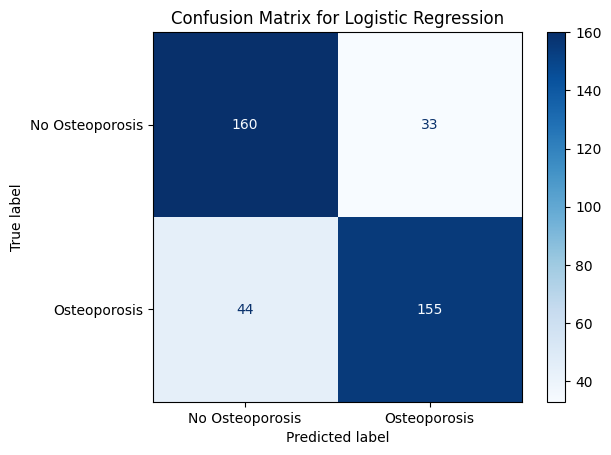

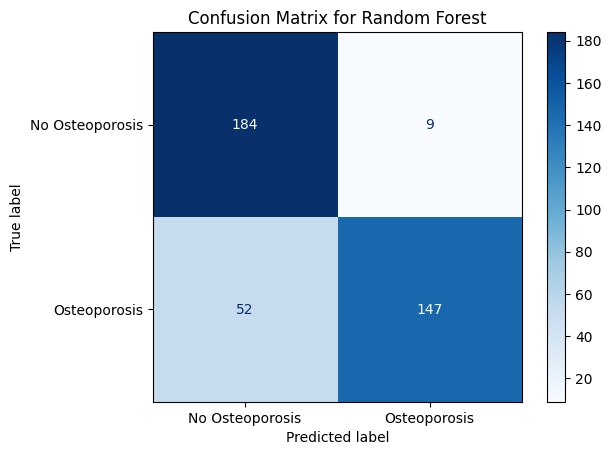

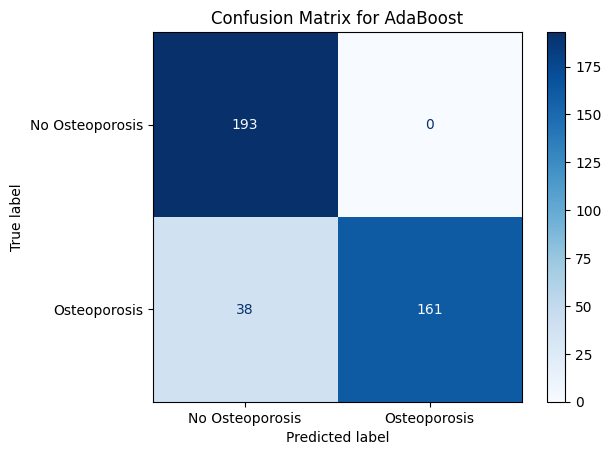

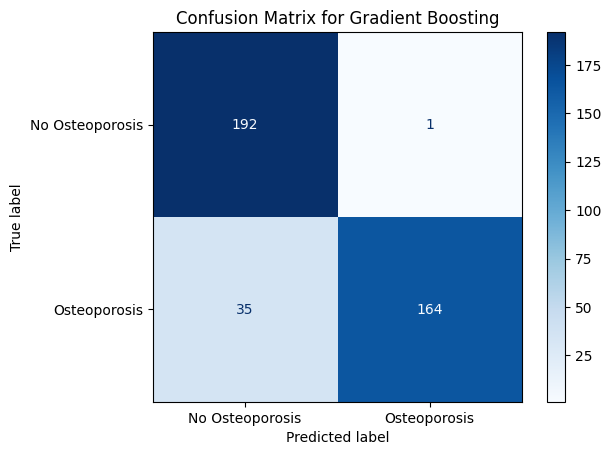

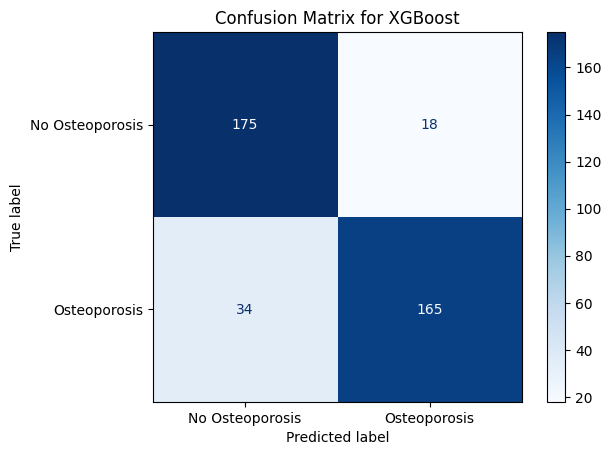

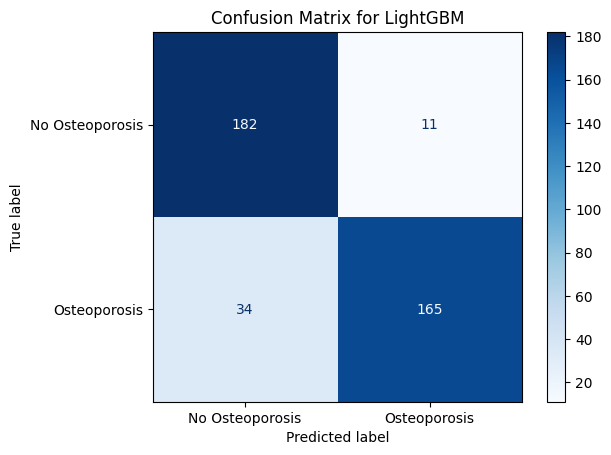

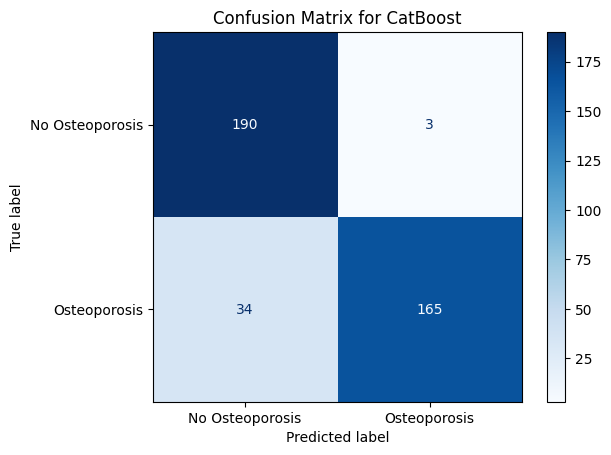

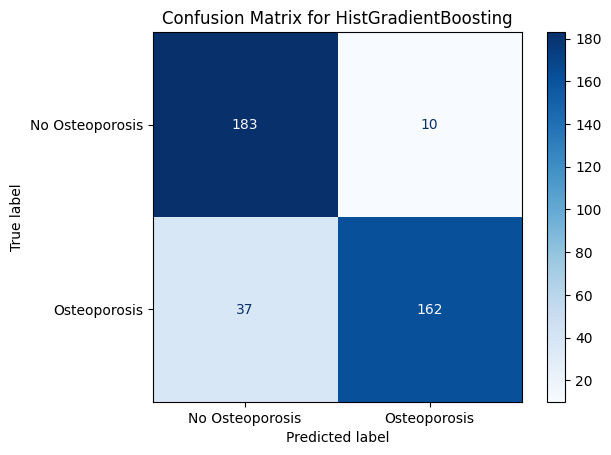

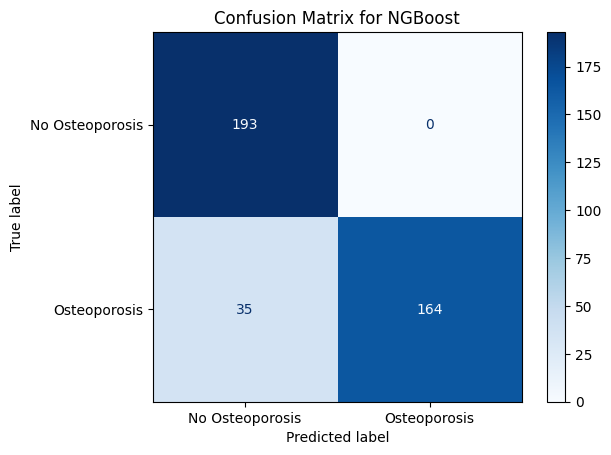

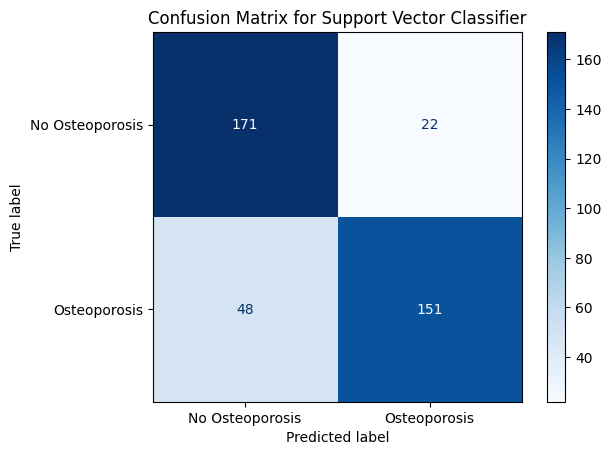

In [56]:
# Plot Confusion Matrices
for name, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Osteoporosis', 'Osteoporosis'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

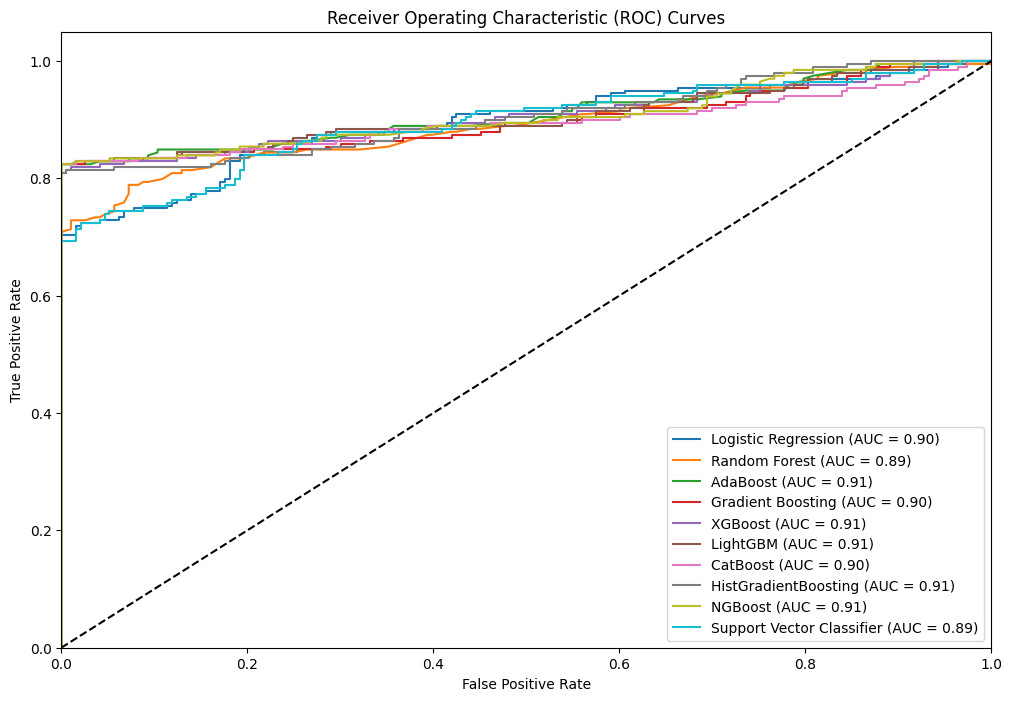

In [57]:
# Plot AUROC curves
plt.figure(figsize=(12, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()